In [2]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2020-10-11 13:21:54,575: Credentials are already in use. The existing account in the session will be replaced.


In [3]:
qc = QuantumCircuit(2,2)
qc.h(0)
qc.cx(0,1)
qc.measure([0,1],[0,1])

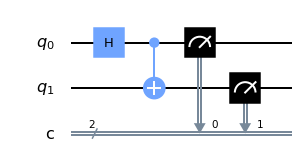

In [6]:
qc.draw()

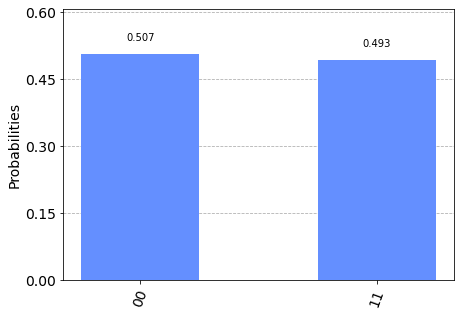

In [5]:
backend_sim = Aer.get_backend("qasm_simulator")
job_sim = execute(qc,backend = backend_sim ,shots = 1000)
result_sim = job_sim.result()
plot_histogram(result_sim.get_counts())

## Running Circuit on IBM Quantum Computer

In [7]:
provide = IBMQ.get_provider('ibm-q')
backend_real = provide.get_backend('ibmq_athens')

In [9]:
job_real = execute(qc,backend = backend_real , shots = 1000)

In [10]:
from qiskit.tools.monitor import job_monitor

In [11]:
job_monitor(job_real)

Job Status: job has successfully run


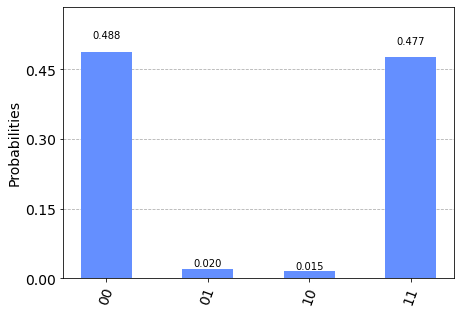

In [12]:
result_real = job_real.result()
plot_histogram(result_real.get_counts())

## Finding the least busy Quantum Computer

In [19]:
from qiskit.providers.ibmq import least_busy

In [29]:
backend_least_busy = least_busy(provider.backends(filters = lambda x:x.configuration().n_qubits>=2 
                                                and not x.configuration().simulator
                                               and x.status().operational == True))

In [31]:
job_least_busy = execute(qc,backend = backend_least_busy, shots = 1000)

In [33]:
print(backend_lest_busy)

ibmq_16_melbourne


In [34]:
job_monitor(job_least_busy)

Job Status: job has successfully run


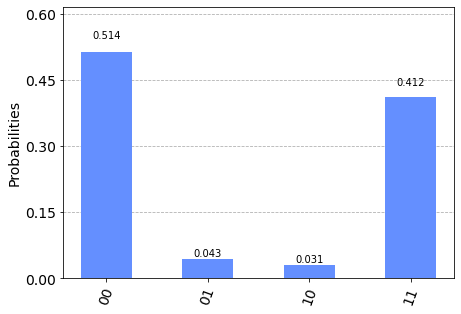

In [36]:
result_least_busy = job_least_busy.result()
plot_histogram(result_least_busy.get_counts())